In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import ast

# Bivariate analysis

## Minutes and n_steps

We have seen that "minutes" and "n_steps" have nearly the simular bihaviour. It's leads us to the following question

**Question**
- Does a higher number of steps correspond to more minutes as well ?

## Load Data

In [2]:
df = pd.read_csv("recipe_raw_without_NA.csv")

In [3]:
df.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

## Qualitative analysis

In [4]:
minutes = df["minutes"]
n_steps = df["n_steps"]

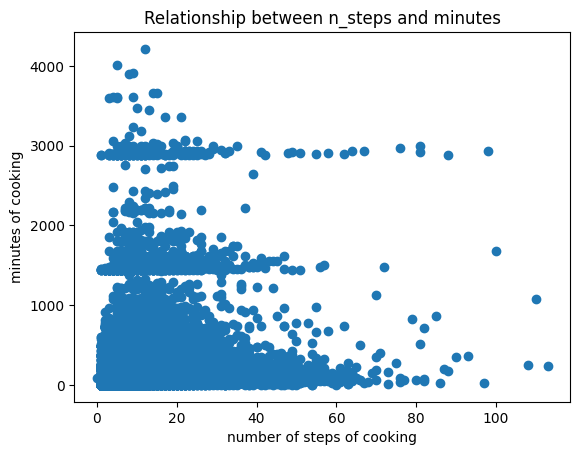

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title ("Relationship between n_steps and minutes")
plt.xlabel("number of steps of cooking")
plt.ylabel("minutes of cooking")
plt.scatter(n_steps, minutes)
plt.show()

Our intuition is misleading. As we can see, when the number of steps increase, the time to cook doesn't follow the same direction. In fact, the opposite might true. But in this graphic, the relashionship is not clear. To better understand this,  we have to linearize the relationship. 

In [6]:
minutes_log = np.log(minutes)

C:\Users\Mita\anaconda3\envs\portofolio\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log 0 = undefined
So, we have to check if we have values = 0.

In [7]:
# Verify if minutes have 0 minutes
df[minutes == 0].count()

name              429
id                429
minutes           429
contributor_id    429
submitted         429
tags              429
nutrition         429
n_steps           429
steps             429
description       429
ingredients       429
n_ingredients     429
dtype: int64

It may mean that the recipe needs just a few seconds to cook. So, we cannot delete these observarions. We will transform then the variable "n_steps".

In [8]:
# Log n_steps 
n_steps_log = np.log(n_steps)

C:\Users\Mita\anaconda3\envs\portofolio\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
df[n_steps == 0].count()

name              1
id                1
minutes           1
contributor_id    1
submitted         1
tags              1
nutrition         1
n_steps           1
steps             1
description       1
ingredients       1
n_ingredients     1
dtype: int64

In [10]:
# Delete n_steps = 0
df = df[df["n_steps"] != 0]

In [11]:
n_steps = df["n_steps"]
n_steps_log = np.log(n_steps)
minutes = df["minutes"]

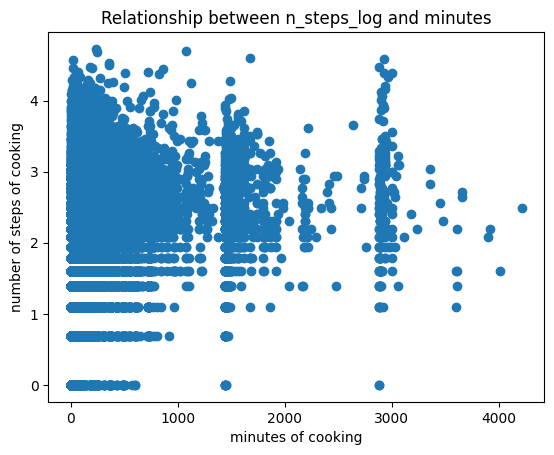

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title ("Relationship between n_steps_log and minutes")
plt.ylabel("number of steps of cooking")
plt.xlabel("minutes of cooking")
plt.scatter(minutes, n_steps_log)
plt.show()

We have observed a relationship, but it is not linear. In fact, we can identify three distinct clusters. The first cluster ranges from 0 to around 1200 minutes. In this group, regardless of the number of steps, the cooking time remains very low. As the cooking time increases, the number of steps tends to converge around a level between 2 and 3. This same pattern appears in the other two clusters as well.

We want to test Pearson correlation anymore in order to verify if it makes the linear relashionship.

In [13]:
# Pearson correlation
r, p_value = st.pearsonr(minutes, n_steps_log)
print(r, p_value)

0.104413079895389 0.0


The correlation coefficient is near to 0. It seems that there is no relationship. But the test confirm that p-value < 0.05 and H0 (no relationship) is rejected. The two results are contraire. What's wrong? 

P-value is sensitive to the size of the data. Here we have 226186 observations. The right idea is to say that there no linear-relationship. 

In [14]:
print(df.shape[0])

226186


**Conclusion : **

<span style ="color :green">To modelize the relationship between minutes and n_steps, linear regression won't the good model. </span> 

# ID_contributor and the minutes

The number of contribution is not the same for all contributor. Is there a relationship between this variable and the time cooking? 

In [15]:
contributor = df["contributor_id"]

In [16]:
# Check if there are one contributor with one contribution
contributor.value_counts()

contributor_id
89831      3112
37449      2482
37779      2472
58104      1514
169430     1375
           ... 
536675        1
86961         1
621692        1
2930834       1
124064        1
Name: count, Length: 27670, dtype: int64

As we can can see, we have have at least 05 contributor with one contribution. Let's see how many are they exactly.

In [17]:
type(contributor.value_counts())

pandas.core.series.Series

In [18]:
contributor_value_counts = contributor.value_counts()

In [19]:
contributor_value_counts_percentage = ((contributor_value_counts == 1).sum() / len(df)) * 100
print(f"There are :", round(contributor_value_counts_percentage), "% of contributor with one contribution")

There are : 7 % of contributor with one contribution


There are relatively many of them.

## Let's put the distribution of each contributor

In [20]:
# Let's group values by list
group_by_contributor_minutes_df = df.groupby('contributor_id')['minutes'].apply(list)
group_by_contributor_minutes_df

contributor_id
27                                                    [10, 105]
1530          [40, 27, 185, 50, 30, 54, 196, 50, 115, 50, 5,...
1531                                               [150, 85, 0]
1533          [40, 30, 70, 45, 60, 25, 20, 5, 30, 17, 25, 26...
1534          [0, 45, 1450, 120, 85, 32, 45, 75, 10, 0, 5, 6...
                                    ...                        
2002234364                                                 [45]
2002234769                                                 [75]
2002247884                                                [210]
2002285039                                    [15, 35, 80, 105]
2002289981                                                 [80]
Name: minutes, Length: 27670, dtype: object

In [21]:
group_by_contributor_minutes_df = pd.concat([contributor_value_counts, group_by_contributor_minutes_df], axis=1)

In [22]:
group_by_contributor_minutes_df.head()

count                                            minutes
contributor_id                                                          
89831            3112  [15, 300, 345, 80, 50, 1440, 5, 70, 70, 10, 45...
37449            2482  [5, 50, 10, 40, 15, 12, 40, 110, 30, 15, 17, 2...
37779            2472  [105, 10, 35, 40, 80, 60, 15, 20, 75, 10, 150,...
58104            1514  [15, 5, 60, 40, 13, 55, 20, 10, 30, 60, 30, 60...
169430           1375  [30, 2880, 3, 5, 25, 45, 275, 75, 30, 5, 3, 10...

In [23]:
minutes_trend_list = []
# H0 : Distribution is normal
# H1 : Not normal
for i in group_by_contributor_minutes_df["minutes"] : 
    if len(i) > 20 :
        stat, p = st.normaltest(i)
        if p <= 0.05 : # We can reject H0, mean is correct trend measure
            minutes_trend_list.append(np.median(i))
        else :
                minutes_trend_list.append(np.mean(i))
    else :
        minutes_trend_list.append(np.mean(i))

In [24]:
group_by_contributor_minutes_df["trend_minutes"] = minutes_trend_list

In [25]:
group_by_contributor_minutes_df

count                                            minutes  \
contributor_id                                                             
89831            3112  [15, 300, 345, 80, 50, 1440, 5, 70, 70, 10, 45...   
37449            2482  [5, 50, 10, 40, 15, 12, 40, 110, 30, 15, 17, 2...   
37779            2472  [105, 10, 35, 40, 80, 60, 15, 20, 75, 10, 150,...   
58104            1514  [15, 5, 60, 40, 13, 55, 20, 10, 30, 60, 30, 60...   
169430           1375  [30, 2880, 3, 5, 25, 45, 275, 75, 30, 5, 3, 10...   
...               ...                                                ...   
536675              1                                               [45]   
86961               1                                               [35]   
621692              1                                               [35]   
2930834             1                                               [80]   
124064              1                                               [75]   

                trend_minutes  
contributor_id                 
89831                    50.0  
37449                    30.0  
37779                    50.0  
58104                    25.0  
169430                   31.0  
...                       ...  
536675                   45.0  
86961                    35.0  
621692                   35.0  
2930834                  80.0  
124064                   75.0  

[27670 rows x 3 columns]

## Analys the relationship between count and trend_minutes

In [26]:
X = group_by_contributor_minutes_df["count"]
X_log = np.log(X)
Y = group_by_contributor_minutes_df["trend_minutes"]
Y_log = np.log(Y)

C:\Users\Mita\anaconda3\envs\portofolio\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


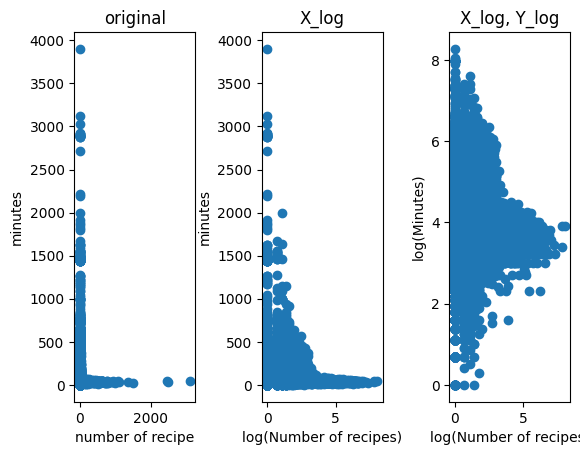

In [27]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
plt.scatter(X, Y)
plt.xlabel("number of recipe")
plt.ylabel("minutes")
plt.title("original")

ax2 = fig.add_subplot(1,3,2)
plt.scatter(X_log, Y)
plt.title("X_log")
plt.xlabel("log(Number of recipes)")
plt.ylabel("minutes")

ax3 = fig.add_subplot(1,3,3)
plt.scatter(X_log, Y_log)
plt.title("X_log, Y_log")
plt.xlabel("log(Number of recipes)")
plt.ylabel("log(Minutes)")

plt.subplots_adjust(wspace=0.55)

plt.show()

There appears to be a weak decreasing relationship: as the number of recipes increases, the duration tends to decrease, although the data is highly dispersed.

## Nutrition and ingredients

Each nutrition list reflect each ingredient list?

In [28]:
# Let's verify with the 05 recipe
df_05_recipe = df[:5]

In [29]:
df_05_recipe

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [30]:
#Transform the sublist in nutrition and ingredients to make calcul
nutrition_05 = df_05_recipe ["nutrition"]
ingredients_05 = df_05_recipe ["ingredients"]

In [31]:
nutrition_05

0         [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1     [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2    [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3     [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
Name: nutrition, dtype: object

In [32]:
# Verification
nutrition_05_equal_to_ingredients_05 = 0
nutrition_05_not_equal_to_ingredients_05 = 0
for list_1, list_2 in zip(nutrition_05, ingredients_05) : 
        if len(list_1) == len(list_2) :
            nutrition_05_equal_to_ingredients_05 += 1
        else :
            nutrition_05_not_equal_to_ingredients_05 += 1

In [33]:
print(nutrition_05_equal_to_ingredients_05)
print(nutrition_05_not_equal_to_ingredients_05)

0
5


In [34]:
# Scalability
nutrition = df["nutrition"]
ingredients = df["ingredients"]

nutrition_equal_to_ingredients = 0
nutrition_not_equal_to_ingredients = 0

for list_1, list_2 in zip(nutrition, ingredients) :
    if len(list_1) == len(list_2) : 
        nutrition_equal_to_ingredients += 1
    else : 
        nutrition_not_equal_to_ingredients += 1

In [35]:
print("the number of observation where length of nutrition is equal to length of ingredients :", nutrition_equal_to_ingredients)
print("the rest :", nutrition_not_equal_to_ingredients)

the number of observation where length of nutrition is equal to length of ingredients : 346
the rest : 225840


In that case, the nutrition is not related of which ingredients.

What we can do? Let's see if the more we have a lot of ingredient, the more we have a great nutrition.

In [36]:
# Let's create a variable of sum of nutrition
nutritition_sum = []
nutrition = nutrition.apply(ast.literal_eval)

for list in nutrition : 
        nutritition_sum.append(np.sum(list))

In [37]:
df.insert(loc = 1,column = "nutritition_sum", value = nutritition_sum)

In [38]:
df

name  nutritition_sum      id  \
0         arriba   baked winter squash mexican style             70.5  137739   
1                   a bit different  breakfast pizza            266.4   31490   
2                          all in the kitchen  chili            442.8  112140   
3                                 alouette  potatoes            439.1   59389   
4                 amish  tomato ketchup  for canning            744.9   44061   
...                                              ...              ...     ...   
226182                                   zydeco soup            581.2  486161   
226183                              zydeco spice mix             76.8  493372   
226184                     zydeco ya ya deviled eggs             81.2  308080   
226185        cookies by design   cookies on a stick            304.0  298512   
226186  cookies by design   sugar shortbread cookies            246.9  298509   

        minutes  contributor_id   submitted  \
0            55           47892  2005-09-16   
1            30           26278  2002-06-17   
2           130          196586  2005-02-25   
3            45           68585  2003-04-14   
4           190           41706  2002-10-25   
...         ...             ...         ...   
226182       60          227978  2012-08-29   
226183        5         1500678  2013-01-09   
226184       40           37779  2008-06-07   
226185       29          506822  2008-04-15   
226186       20          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
226182  ['ham', '60-minutes-or-less', 'time-to-make', ...   
226183  ['15-minutes-or-less', 'time-to-make', 'course...   
226184  ['60-minutes-or-less', 'time-to-make', 'course...   
226185  ['30-minutes-or-less', 'time-to-make', 'course...   
226186  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
226182  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
226183        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
226184         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
226185    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
226186     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['make a choice and proceed with recipe', 'dep...   
1       ['preheat oven to 425 degrees f', 'press dough...   
2       ['brown ground beef in large pot', 'add choppe...   
3       ['place potatoes in a large pot of lightly sal...   
4       ['mix all ingredients& boil for 2 1 / 2 hours ...   
...                                                   ...   
226182  ['heat oil in a 4-quart dutch oven', 'add cele...   
226183        ['mix all ingredients together thoroughly']   
226184  ['in a bowl , combine the mashed yolks and may...   
226185  ['place melted butter in a large mixing bowl a...   
226186  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, g

In [39]:
nutrition_sum = df["nutritition_sum"]
n_ingredients = df["n_ingredients"]

In [40]:
stat, pvalue = st.pearsonr(nutrition_sum, n_ingredients)
print(stat, pvalue)

0.04741596399188792 9.980149029106207e-113


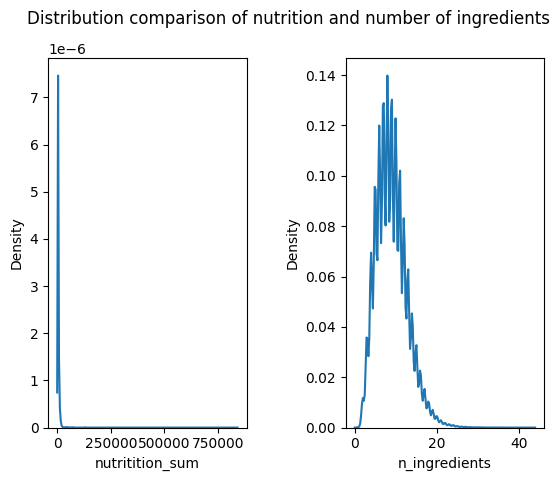

In [41]:
fig = plt.figure()
plt.suptitle("Distribution comparison of nutrition and number of ingredients")
ax1 = fig.add_subplot(1,2,1)
sns.kdeplot(nutrition_sum)
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(n_ingredients)
plt.subplots_adjust(wspace = 0.5)
plt.show()

We can see that the for of distribution are nearly the same. May be, they are correlated. Let's analyse the scatter plot.

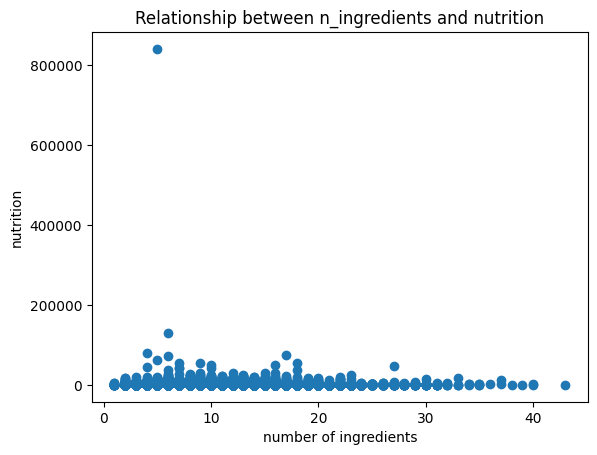

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title ("Relationship between n_ingredients and nutrition")
plt.ylabel("nutrition")
plt.xlabel("number of ingredients")
plt.scatter(n_ingredients, nutrition_sum)
plt.show()

Let's delete the one single observation very different. 

In [43]:
# Let's see
nutrition_maximum = df["nutritition_sum"].max()
nutrition_maximum_row = df[df["nutritition_sum"] == nutrition_maximum]
nutrition_maximum_row

name  nutritition_sum      id  minutes  contributor_id  \
204463  tennessee moonshine         840355.2  193435       20          374913   

         submitted                                               tags  \
204463  2006-11-01  ['30-minutes-or-less', 'time-to-make', 'course...   

                                                nutrition  n_steps  \
204463  [434360.2, 1293.0, 362729.0, 1324.0, 3961.0, 5...        3   

                                                    steps  \
204463  ['to boiled cornmeal add yeast and lots of sug...   

                                 description  \
204463  common moonshine recipe in tennessee   

                                              ingredients  n_ingredients  
204463  ['cornmeal', 'natural bran', 'sugar', 'yeast',...              5

In [48]:
print(len(df["nutritition_sum"]))
print(len(df["n_ingredients"]))

226186
226186


With 5 ingredients, it is impossible to have 840355 Cal. Let's delete it.

In [49]:
df_1 = df[df["nutritition_sum"] != nutrition_maximum]

In [66]:
n_ingredients = df_1["n_ingredients"]
n_ingredients_log = np.log(n_ingredients)
nutritition_sum = df_1["nutritition_sum"]
n_nutritition_sum_log = np.log(nutritition_sum)

In [56]:
print(len(n_ingredients), len(nutritition_sum))

226185 226185


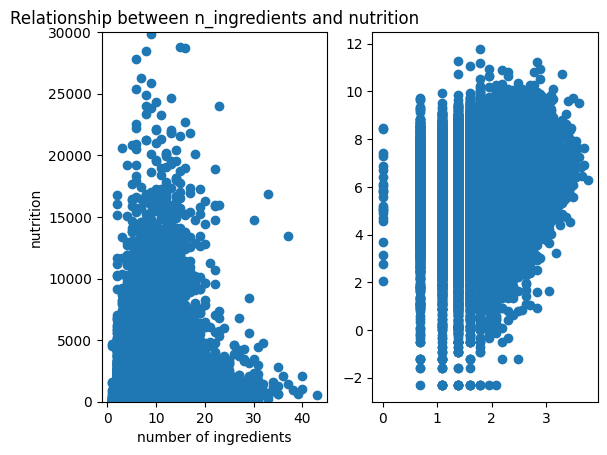

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.title ("Relationship between n_ingredients and nutrition")
plt.ylabel("nutrition")
plt.ylim (top = 30000)
plt.xlabel("number of ingredients")
plt.scatter(n_ingredients, nutritition_sum)
ax2 = fig.add_subplot(1,2,2)
plt.scatter(n_ingredients_log, n_nutritition_sum_log)
plt.show()

The relationship is not evident.